In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [8]:
d1 = pd.read_csv(r"C:\Users\kapar\Downloads\RF\Company_Data.csv")
d1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
# Distribution of the target variable 'Sales'

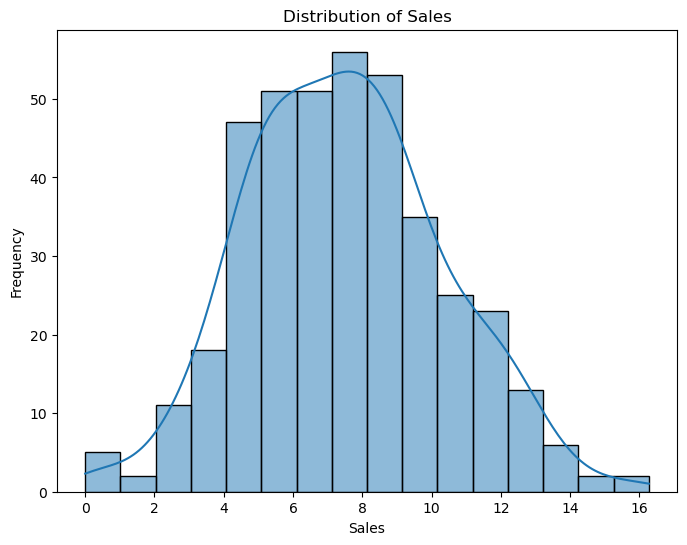

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(d1['Sales'], kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

C:\Users\kapar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


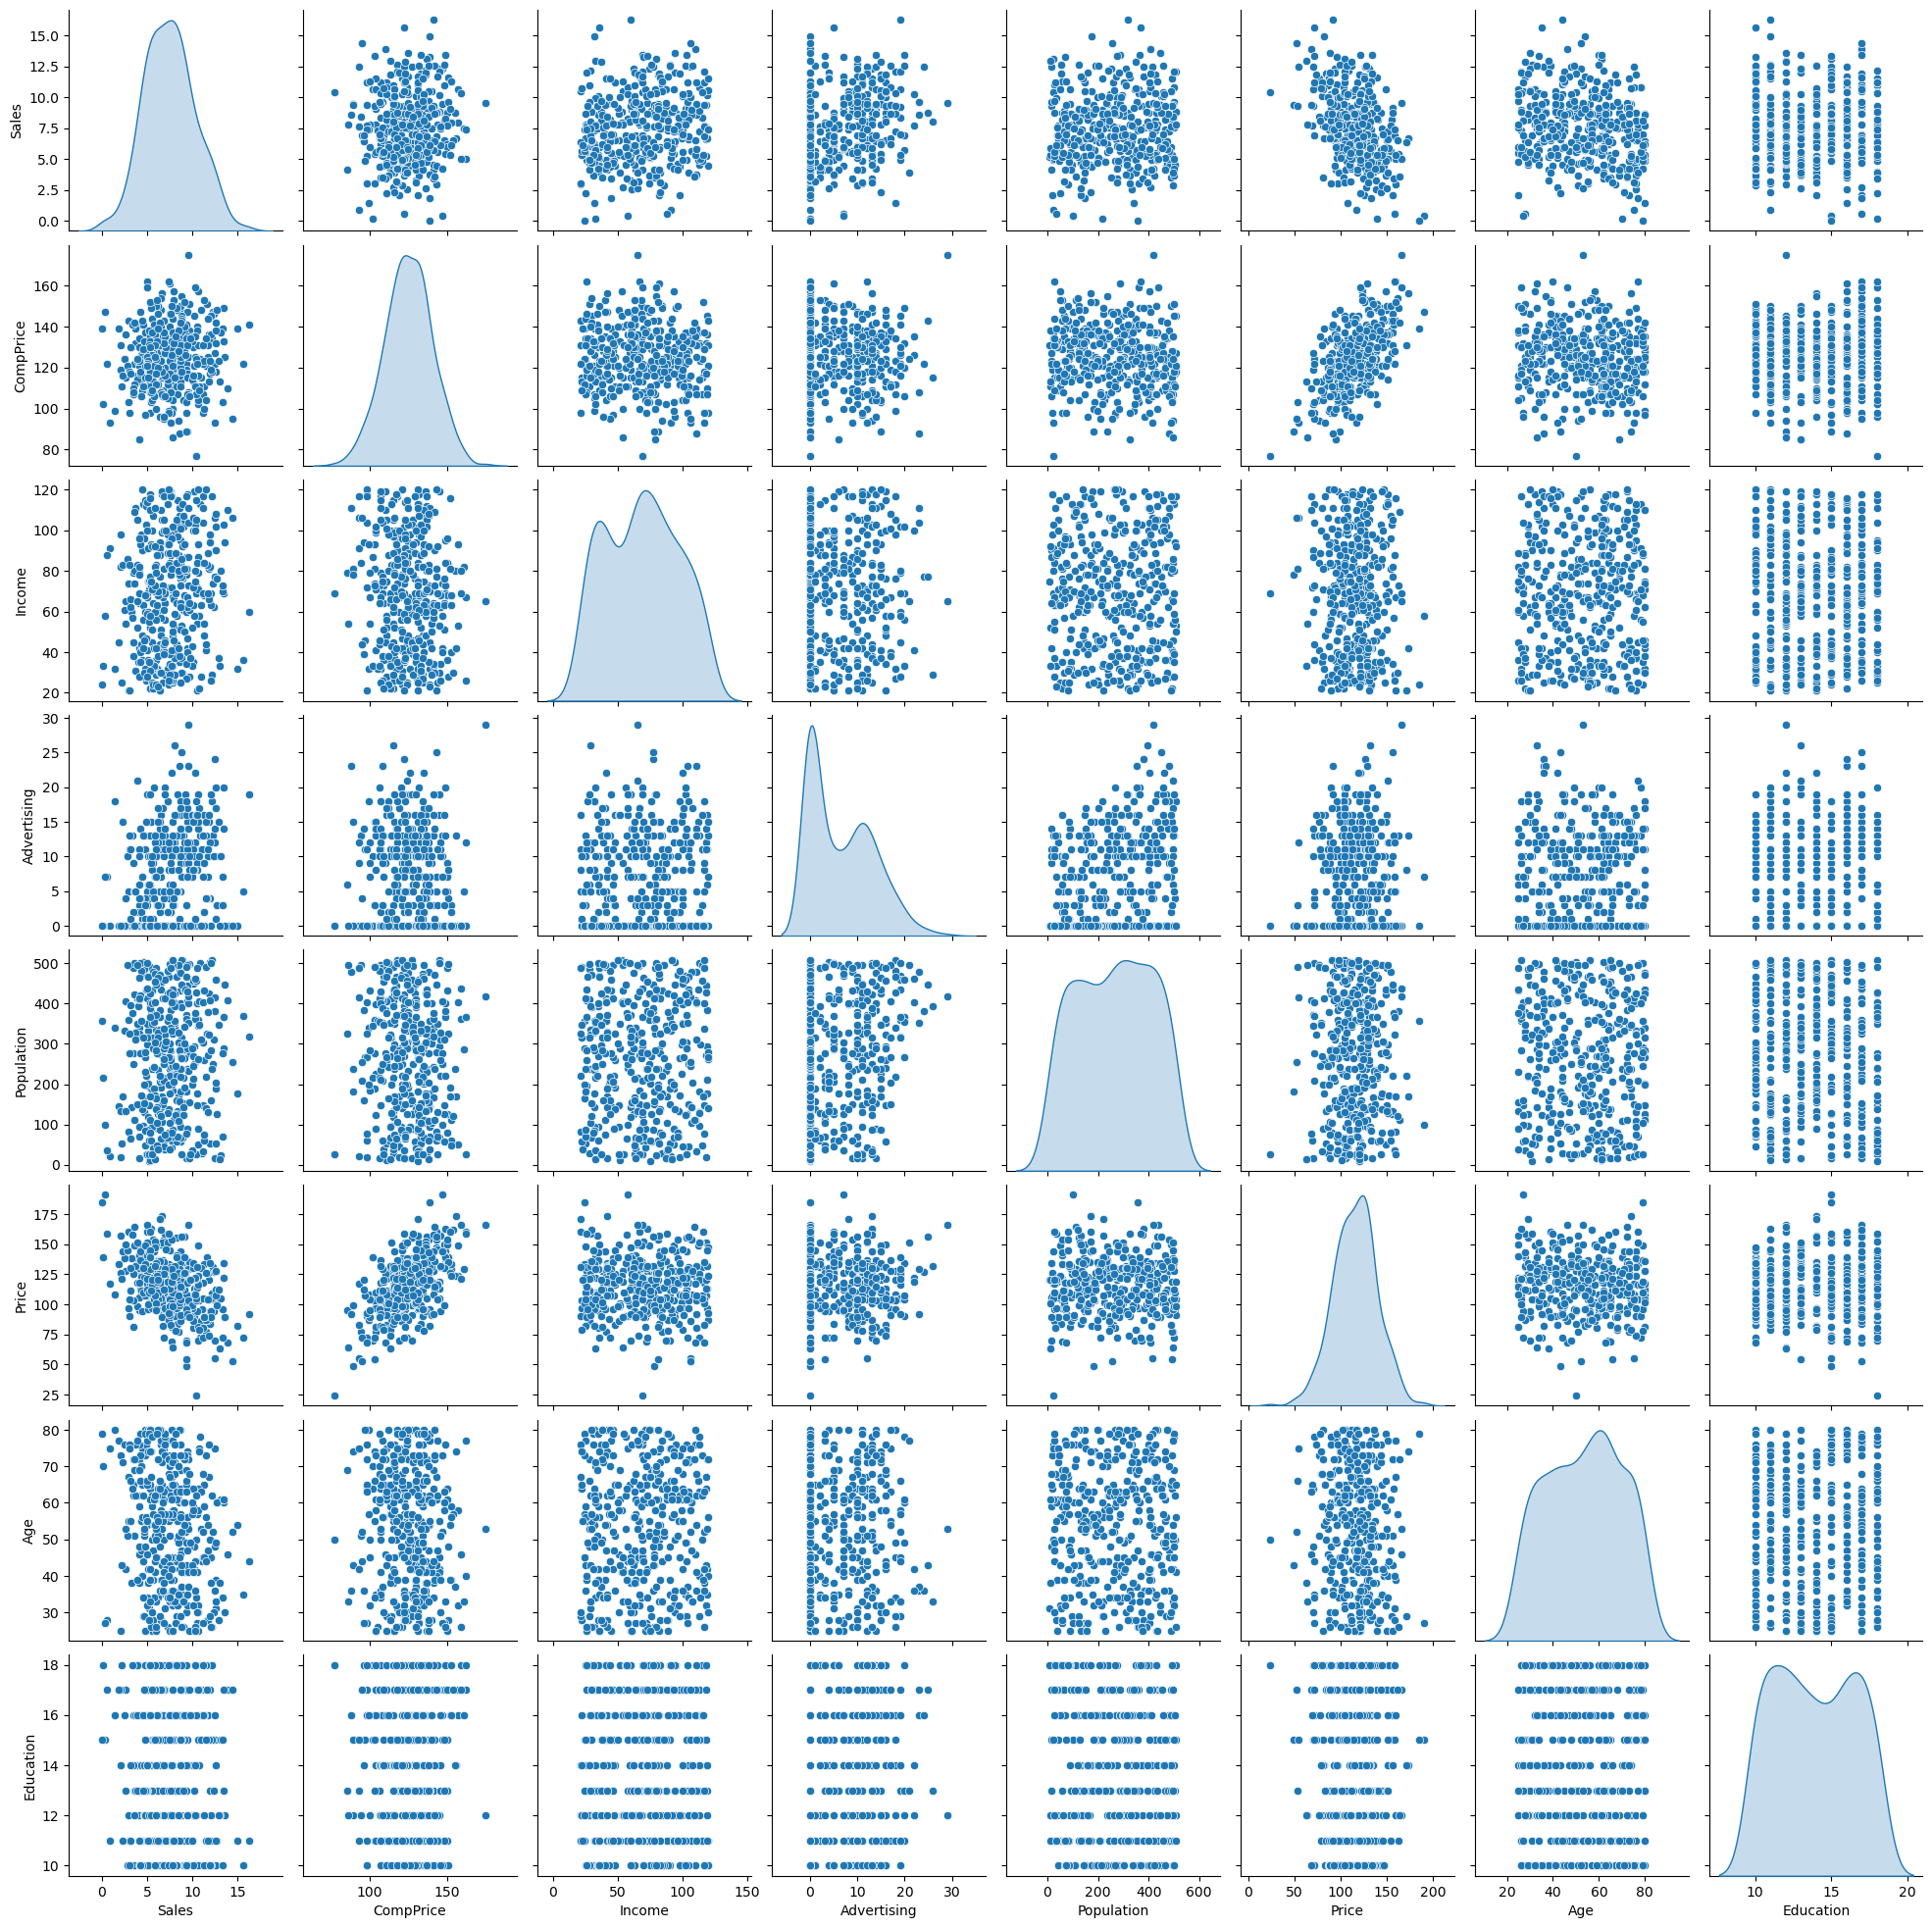

In [11]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(d1, diag_kind='kde')
plt.show()

In [12]:
# Box plots for numerical variables

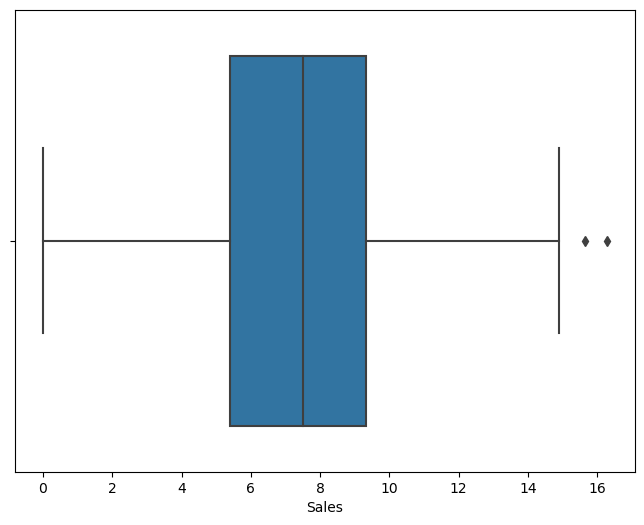

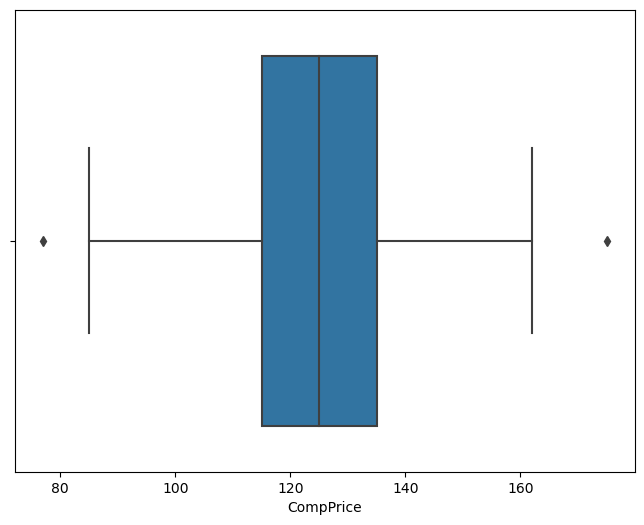

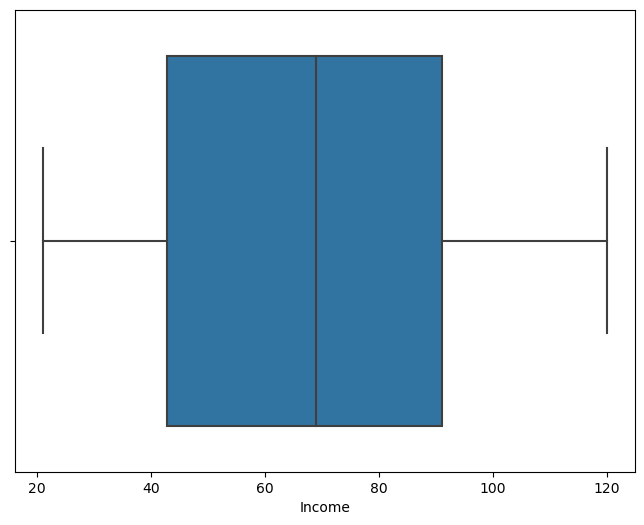

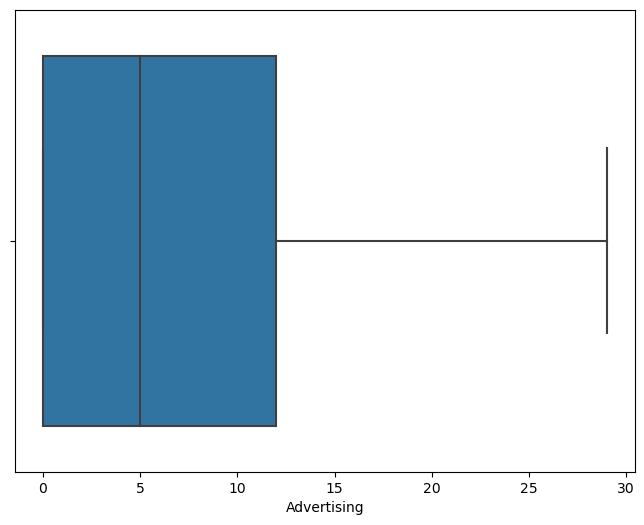

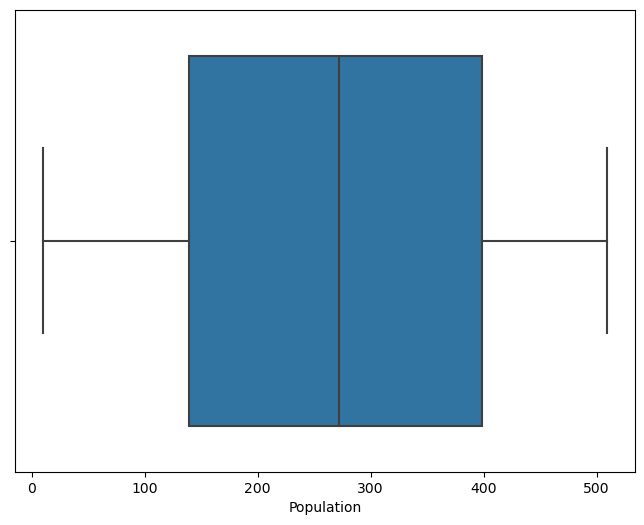

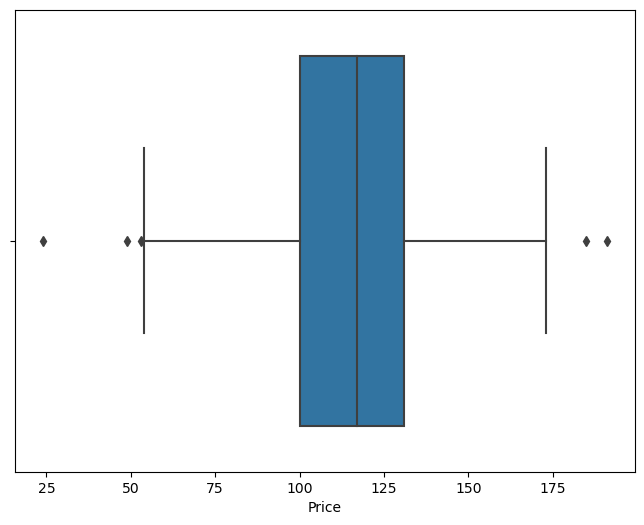

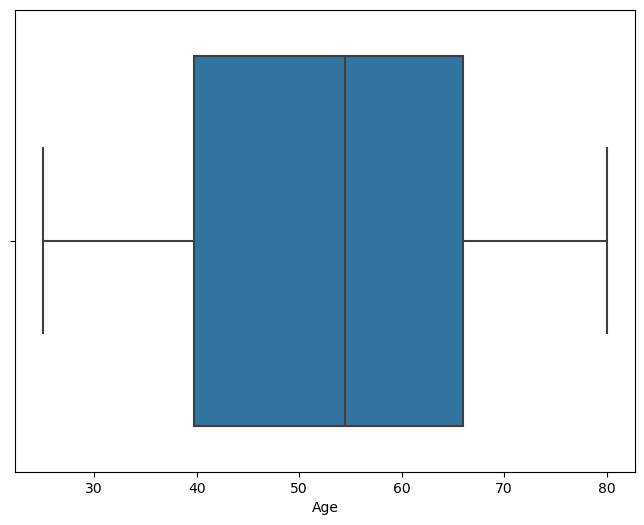

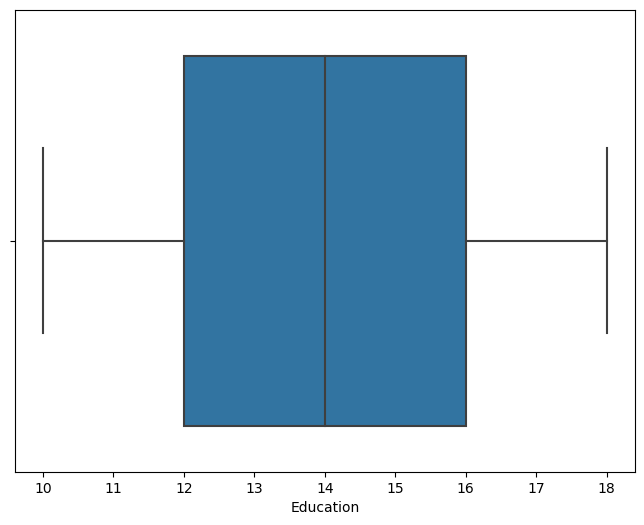

In [13]:
numerical_columns = d1.select_dtypes(include='number').columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=d1)
    plt.show()

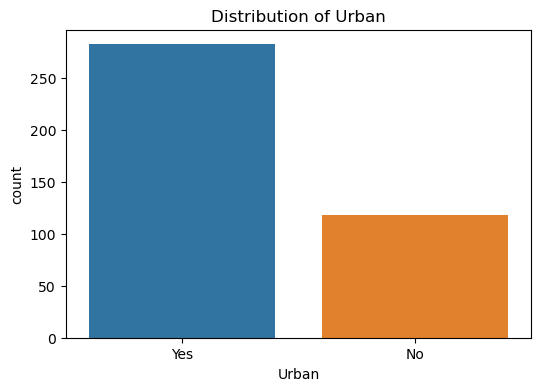

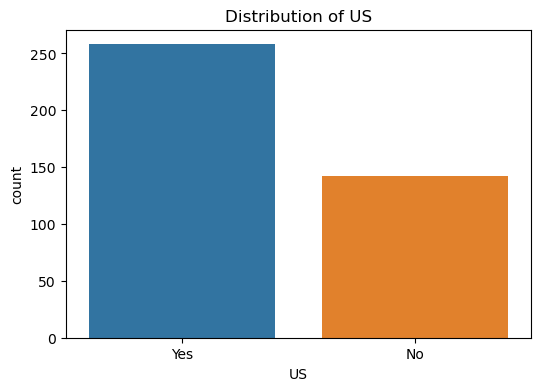

In [14]:
# Count plot for categorical variables 'Urban' and 'US'
categorical_columns = ['Urban', 'US']
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=d1)
    plt.title(f'Distribution of {column}')
    plt.show()

In [15]:
#target varaible

In [16]:
y=d1["Sales"]
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [18]:
# Calculate the threshold (75th percentile)

In [20]:
threshold = np.percentile(y, 75)
threshold 

9.32

In [21]:
# Convert target variable to 'High' or 'Low' according to the threshold


In [22]:
y = y.apply(lambda x: 'High' if x >= threshold else 'Low')
y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: object

In [23]:
x=d1.drop("Sales",axis=1)
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [24]:
 # Data preprocessing: Label Encoding for categorical variables

In [25]:
for columns in x.columns:
    if columns in["ShelveLoc","Urban","US"]:
        le=LabelEncoder()
        x[columns]=le.fit_transform(x[columns])
x


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [26]:
training_Accuracy=[]
testing_accuracy=[]

In [27]:
#importing Random forest 

In [28]:
for i in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.30,random_state=i)
    rfc=RandomForestClassifier(n_estimators=100,
                             max_samples=0.6,
                             max_features=0.7,max_depth=8)

In [29]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.7, max_samples=0.6)

In [30]:
y_pred_train=rfc.predict(x_train)

In [31]:
y_pred_test=rfc.predict(x_test)

In [32]:
testing_accuracy.append(accuracy_score(y_train, y_pred_train))
training_Accuracy.append(accuracy_score(y_test, y_pred_test))

In [33]:
print("average training accuracy :",np.mean(training_Accuracy))
print("average testing accuracy :",np.mean(testing_accuracy))

average training accuracy : 0.8583333333333333
average testing accuracy : 0.9892857142857143


In [37]:
from sklearn import tree
import matplotlib.pyplot as plt


In [38]:
first_tree = rfc.estimators_[0]


In [40]:
feature_names = list(x.columns)

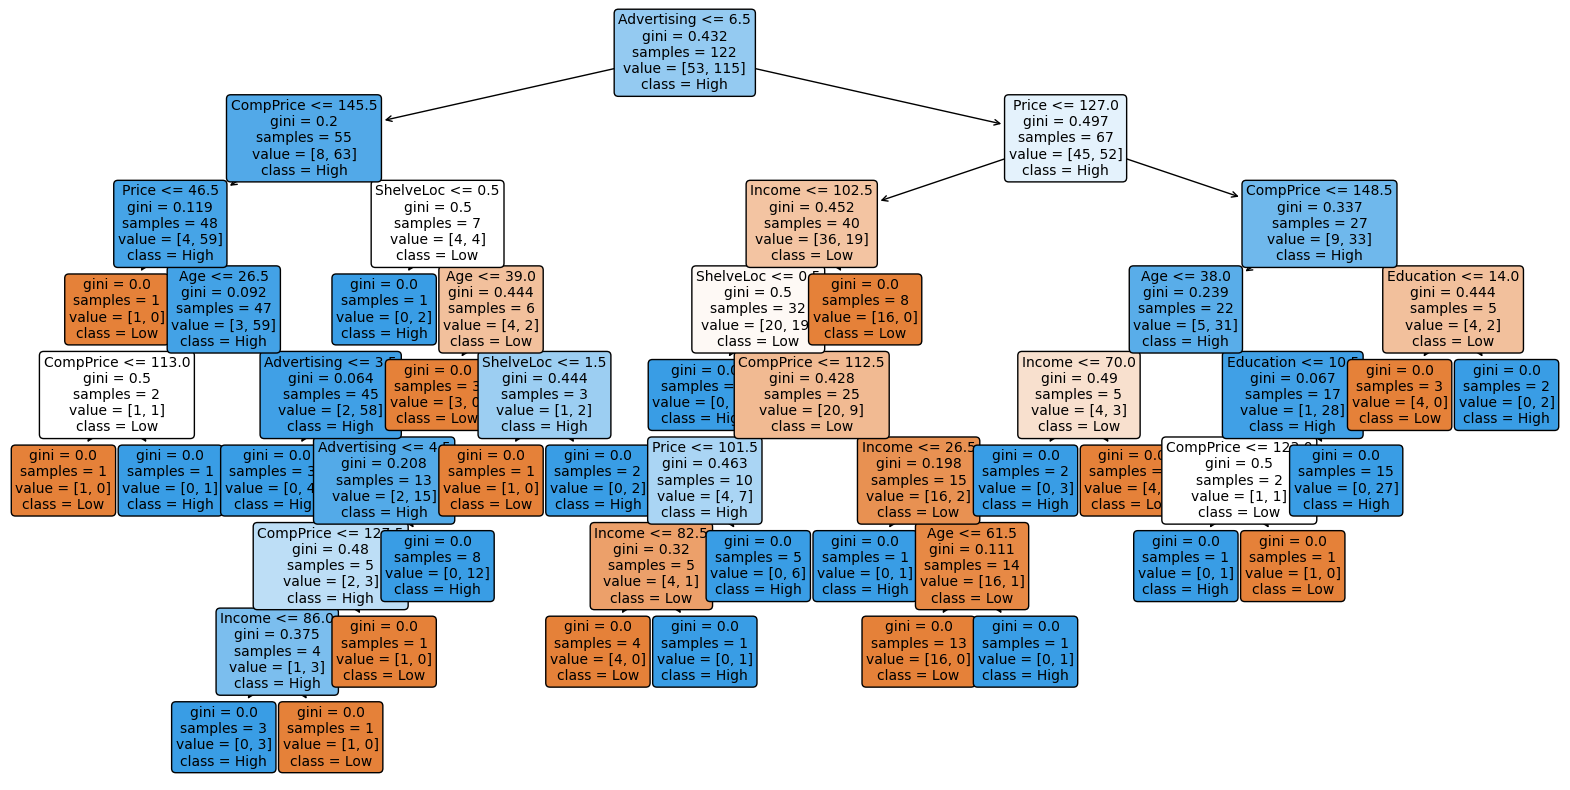

In [42]:
plt.figure(figsize=(20, 10))
tree.plot_tree(first_tree, 
               feature_names=feature_names, 
               class_names=['Low', 'High'], 
               filled=True, 
               rounded=True,
               fontsize=10)
plt.show()